In [2]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_textbook.tools import array_to_latex

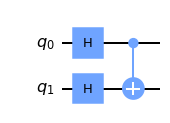

In [3]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.draw(output='mpl')

<IPython.core.display.Math object>

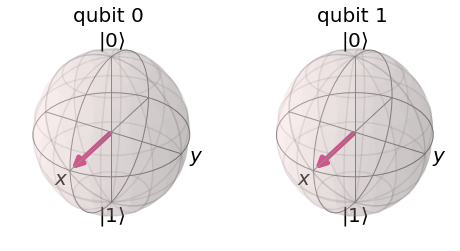

In [4]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
array_to_latex(final_state, pretext="\\text{Statevector} = ", precision=1)
plot_bloch_multivector(final_state)

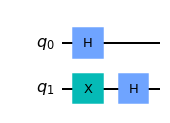

In [7]:
# Let's put the target qubit in the state |->, so it has a negative phase
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.x(1)
qc1.h(1)
display(qc1.draw(output='mpl'))

<IPython.core.display.Math object>

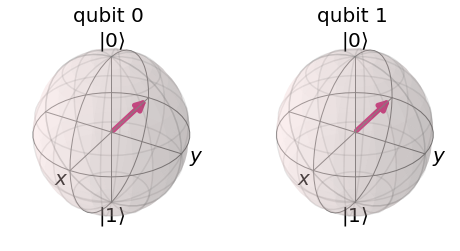

In [13]:
# Let's see the results
qobj1 = assemble(qc1)
final_state1 = svsim.run(qobj1).result().get_statevector()
array_to_latex(final_state1, pretext="\\text{Statevector |+->} = ", precision=1)
plot_bloch_multivector(final_state1)

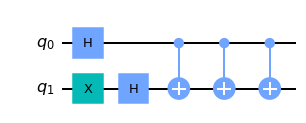

<IPython.core.display.Math object>

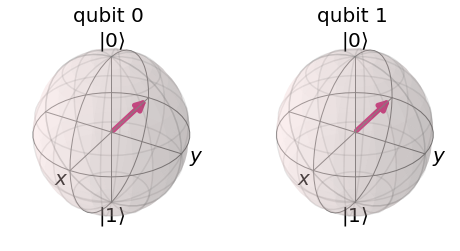

In [11]:
qc1.cx(0,1)
display(qc1.draw(output='mpl'))

qobj1 = assemble(qc1)
final_state1 = svsim.run(qobj1).result().get_statevector()
array_to_latex(final_state1, pretext="\\text{Statevector |-->} = ", precision=1)
plot_bloch_multivector(final_state1)

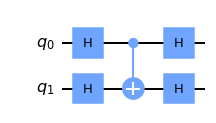

<IPython.core.display.Math object>

In [17]:
# H-gate transforms |+> --> |0> and |-> --> |1>
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.h(1)
qc2.cx(0,1)
qc2.h(0)
qc2.h(1)
display(qc2.draw(output='mpl'))

usim = Aer.get_backend('unitary_simulator')
qobj2 = assemble(qc2)
unitary = usim.run(qobj2).result().get_unitary()
array_to_latex(unitary, pretext="\\text{Circuit = }\n")

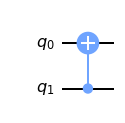

<IPython.core.display.Math object>

In [19]:
qc3 = QuantumCircuit(2)
qc3.cx(1,0)
display(qc3.draw(output='mpl'))

qobj3 = assemble(qc3)
unitary3 = usim.run(qobj3).result().get_unitary()
array_to_latex(unitary3, pretext="\\text{Circuit = }\n")

In [20]:
# Kickback wih T-gate
qc4 = QuantumCircuit(2)
qc4.cp(pi/4, 0, 1)
qc4.draw()

q_0: ────■─────
     ┌───┴────┐
q_1: ┤ P(π/4) ├
     └────────┘

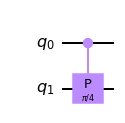

In [21]:
qc4.draw(output='mpl')

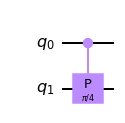

<IPython.core.display.Math object>

In [25]:
display(qc4.draw(output='mpl'))

# See Result:
qobj4 = assemble(qc4)
unitary4 = usim.run(qobj4).result().get_unitary()
array_to_latex(unitary4, pretext="\\text{Controlled-T} = \n")

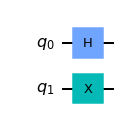

In [26]:
qc5 = QuantumCircuit(2)
qc5.h(0)
qc5.x(1)
qc5.draw(output='mpl')

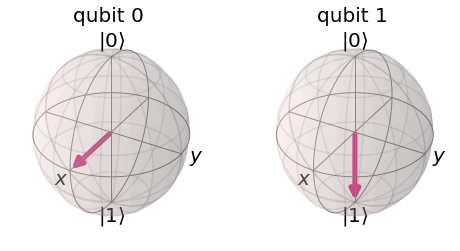

In [27]:
# See Results:
qobj5 = assemble(qc5)
final_state5 = svsim.run(qobj5).result().get_statevector()
plot_bloch_multivector(final_state5)

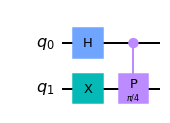

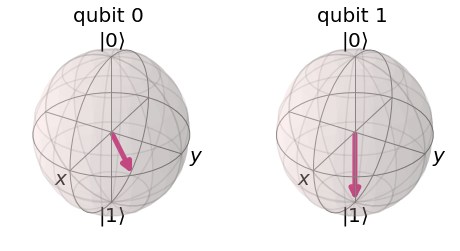

In [30]:
qc6 = QuantumCircuit(2)
qc6.h(0)
qc6.x(1)
# Add Controlled-T
qc6.cp(pi/4, 0, 1)
display(qc6.draw(output='mpl'))
# See Results:
qobj6 = assemble(qc6)
final_state6 = svsim.run(qobj6).result().get_statevector()
plot_bloch_multivector(final_state6)

In [31]:
import qiskit
qiskit.__qiskit_version__

{'qiskit-terra': '0.16.4',
 'qiskit-aer': '0.7.6',
 'qiskit-ignis': '0.5.2',
 'qiskit-ibmq-provider': '0.12.1',
 'qiskit-aqua': '0.8.2',
 'qiskit': '0.24.0'}